# Explore here

## Step 1: Problem statement and data collection

Problem statement: classify houses according to their region and median income.

In [65]:
# Your code here

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [67]:
# Import dataset to start working with it
import pandas as pd

raw_data = pd.read_csv("../data/raw/housing.csv", sep=",")
raw_data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [68]:
# We do not care about columns other than Latitude, Longitude, or Median Income for this problem statement
raw_data = raw_data[["MedInc", "Latitude", "Longitude"]]
raw_data.drop_duplicates(inplace=True)

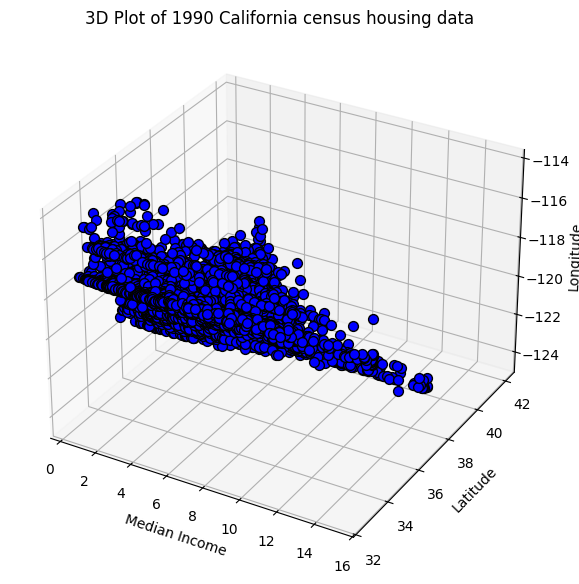

In [69]:
# Set up the 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Plot the data points
ax.scatter(
    raw_data["MedInc"],
    raw_data["Latitude"],
    raw_data["Longitude"],
    marker="o",
    edgecolor="k",
    s=50,
    c="b",
    depthshade=False,
)

# Set plot titles and labels
ax.set_title("3D Plot of 1990 California census housing data")
ax.set_xlabel("Median Income")
ax.set_ylabel("Latitude")
ax.set_zlabel("Longitude")

# Show the plot
plt.show()


In [70]:
# alternate means of plotting same, using package learned about during last week's assignment:
import plotly.express as px

# --- 3‑D scatter using Plotly Express ---------------------------------
fig = px.scatter_3d(
    raw_data,
    x="MedInc",  
    y="Latitude", 
    z="Longitude",
    ## keep the single‑color aesthetic of the matplotlib version
    color_discrete_sequence=["#1f77b4"],  # Plotly’s default blue
    size_max=8,  # caps marker scaling if `size=` is ever used
    width=1000,
    height=700,
)

# Set title and axis labels
fig.update_layout(
    title="3D Plot of 1990 California census housing data",
    scene=dict(
        xaxis_title="Median Income",
        yaxis_title="Latitude",
        zaxis_title="Longitude",
    ),
)

# Optional: define a starting camera angle (similar to your second snippet)
camera = dict(up=dict(x=0, y=0, z=1), eye=dict(x=1.75, y=1.75, z=0.6))
fig.update_layout(scene_camera=camera)

fig.show()

In [82]:
# split training vs. test data

from sklearn.model_selection import train_test_split

feature_cols = ["Latitude", "Longitude"]
target_col = "MedInc"  
plot_cols = [target_col, *feature_cols]  


X = raw_data[feature_cols]
y = raw_data[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()


,Latitude,Longitude
19985,36.20,-119.31
11235,33.81,-117.96
2271,36.78,-119.80
8660,33.85,-118.39
6250,34.04,-117.98


In [ ]:
# Apply K-Means clustering with 3 clusters
kmeans_model = KMeans(n_clusters=6, random_state=42)
kmeans_model.fit(X_train)

In [ ]:
train_labels = kmeans_model.labels_
test_labels = kmeans_model.predict(X_test)

In [83]:
# dataframes to plot so we only have to plot training data before we start adding in test data
train_plot = (
    raw_data.loc[X_train.index, plot_cols].assign(  # grab original numeric cols
        Cluster=train_labels
    )  # add predicted label
)

test_plot = raw_data.loc[X_test.index, plot_cols].assign(Cluster=test_labels)

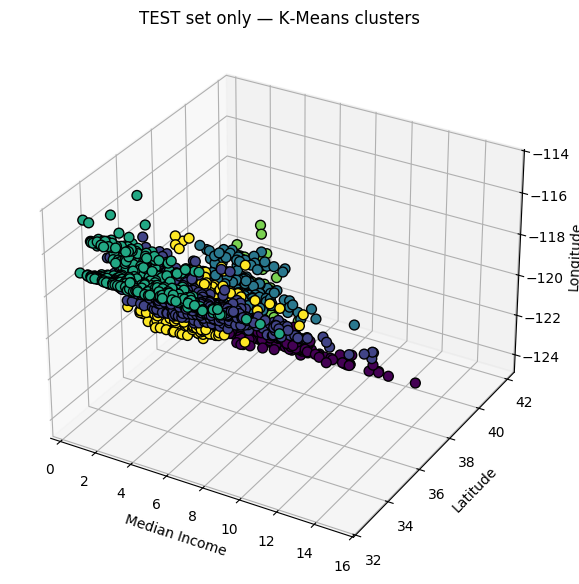

In [84]:
# Create a 3D plot for the clustered data points
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Plot the data points using the cluster labels for coloring
ax.scatter(
    test_plot["MedInc"],
    test_plot["Latitude"],
    test_plot["Longitude"],
    c=test_plot["Cluster"],
    cmap="viridis",
    marker="o",
    edgecolor="k",
    s=50,
    depthshade=False,
)

# Set plot titles and labels
ax.set_title("TEST set only — K‑Means clusters")
ax.set_xlabel("Median Income")
ax.set_ylabel("Latitude")
ax.set_zlabel("Longitude")

# Show the plot
plt.show()


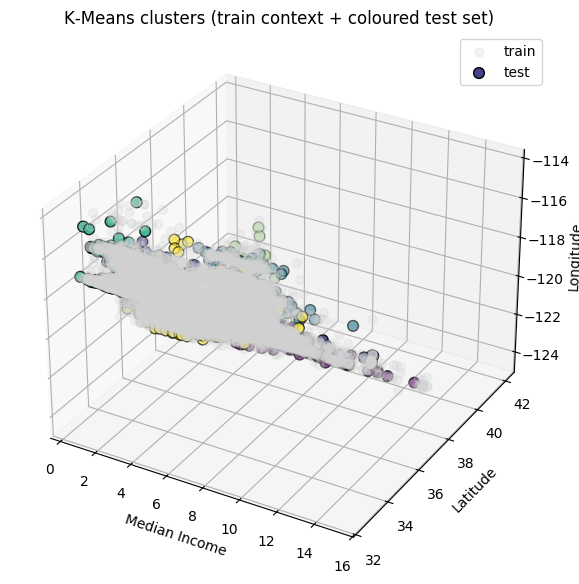

In [85]:
# Create a 3D plot for the clustered data points
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# training points in light‑gray for context
ax.scatter(
    train_plot["MedInc"],
    train_plot["Latitude"],
    train_plot["Longitude"],
    c="lightgray",
    alpha=0.25,
    s=40,
    label="train",
)

# test points coloured by predicted cluster
ax.scatter(
    test_plot["MedInc"],
    test_plot["Latitude"],
    test_plot["Longitude"],
    c=test_plot["Cluster"],
    cmap="viridis",
    s=60,
    edgecolor="k",
    label="test",
)

ax.set_title("K‑Means clusters (train context + coloured test set)")
ax.set_xlabel("Median Income")
ax.set_ylabel("Latitude")
ax.set_zlabel("Longitude")
ax.legend()
plt.show()

In [ ]:
import plotly.express as px

# -------------------------------------------------------------------
# 1) TEST‑SET‑ONLY INTERACTIVE FIGURE
# -------------------------------------------------------------------
fig_test = px.scatter_3d(
    test_plot,
    x="MedInc",
    y="Latitude",
    z="Longitude",
    color="Cluster",
    color_continuous_scale=px.colors.sequential.Viridis,
    opacity=0.90,
    width=1000,
    height=700,
)
fig_test.update_layout(
    title="K‑Means – TEST set (predicted clusters)",
    scene=dict(
        xaxis_title="Median Income",
        yaxis_title="Latitude",
        zaxis_title="Longitude",
    ),
    scene_camera=dict(up=dict(x=0, y=0, z=1), eye=dict(x=1.6, y=1.6, z=0.5)),
)
fig_test.show()


In [ ]:
import plotly.graph_objects as go

fig_overlay = go.Figure()

# trace 1 – TRAIN points in light‑grey
fig_overlay.add_trace(
    go.Scatter3d(
        x=train_plot["MedInc"],
        y=train_plot["Latitude"],
        z=train_plot["Longitude"],
        mode="markers",
        marker=dict(size=4, color="lightgrey", opacity=0.25),
        name="Train (fitted)",
        hoverinfo="skip",  # keeps the hover tool‑tips uncluttered
    )
)

# trace 2 – TEST points coloured by cluster
fig_overlay.add_trace(
    go.Scatter3d(
        x=test_plot["MedInc"],
        y=test_plot["Latitude"],
        z=test_plot["Longitude"],
        mode="markers",
        marker=dict(
            size=6,
            color=test_plot["Cluster"],
            colorscale="Viridis",
            colorbar=dict(title="Cluster"),
            opacity=0.90,
        ),
        name="Test (predicted)",
    )
)

fig_overlay.update_layout(
    title="K‑Means – Train context (grey) with coloured Test clusters",
    width=1000,
    height=700,
    scene=dict(
        xaxis_title="Median Income",
        yaxis_title="Latitude",
        zaxis_title="Longitude",
    ),
    scene_camera=dict(up=dict(x=0, y=0, z=1), eye=dict(x=1.6, y=1.6, z=0.5)),
    legend=dict(itemsizing="constant"),
)
fig_overlay.show()


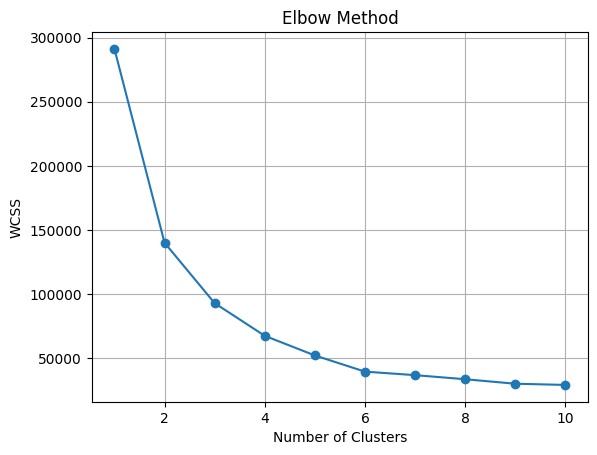

In [75]:
# Create a list to store the WCSS values for different numbers of clusters
wcss = []

# Calculate WCSS for cluster numbers ranging from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(raw_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


## Hierarchical clustering

In [76]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


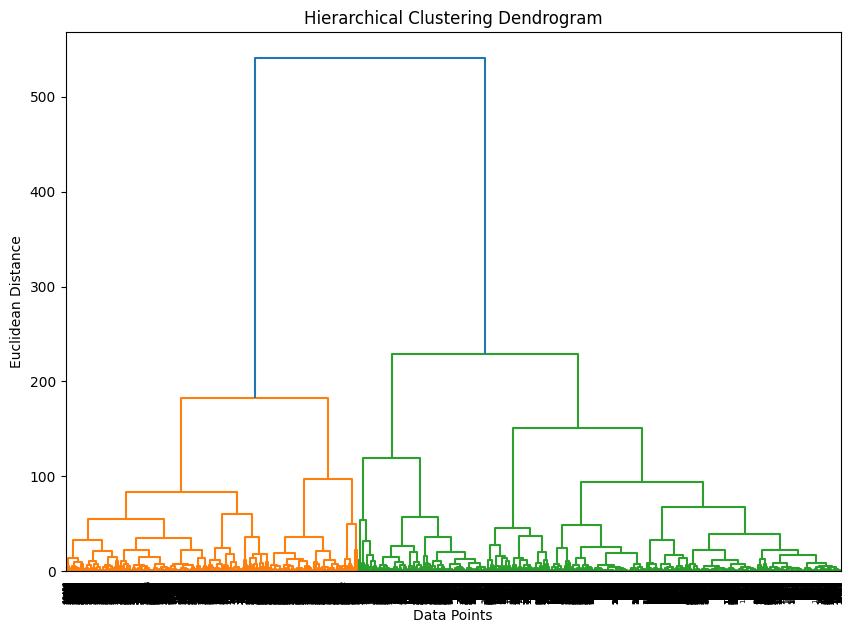

In [77]:
# Perform hierarchical clustering using the 'ward' method
Z = linkage(
    raw_data[["MedInc", "Latitude", "Longitude"]],
    method="ward",
)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


## Principal Component Analysis (PCA)

       Principal Component 1  Principal Component 2
0                   3.278618               4.417702
1                   3.258095               4.394640
2                   3.299487               3.375453
3                   3.360559               1.797467
4                   3.523765               0.233730
...                      ...                    ...
20630               4.000204              -2.149254
20631               4.055281              -1.167282
20632               4.047232              -2.001884
20633               4.109374              -1.831779
20634               3.993982              -1.324558

[20635 rows x 2 columns]


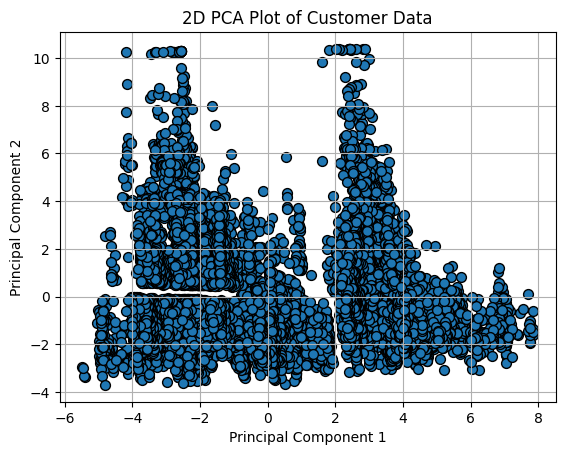

In [78]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensions of the customer data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(raw_data)

# Create a DataFrame with the 2 principal components
pca_df = pd.DataFrame(
    pca_result, columns=["Principal Component 1", "Principal Component 2"]
)

# Display the resulting DataFrame
print(pca_df)

# Plot the 2D data points after PCA
plt.scatter(
    pca_df["Principal Component 1"],
    pca_df["Principal Component 2"],
    marker="o",
    edgecolor="k",
    s=50,
)
plt.title("2D PCA Plot of Customer Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## Trying out 